In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.special import beta
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16.0, 20.0)

def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def lognorm_func(x, a, mu, sigma):
    return (a/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))

def weibull_func(x, a, k, lamda):
    return a * (k/lamda)* (x/lamda)**(k-1) * np.exp(-(x/lamda)**k)

def poisson_func(x, a, lamb):
    return a*(lamb**x/factorial(x))*np.exp(-lamb)

def moyal_func(x, a, x0, scale):
    return a * np.exp( - ((x-x0)/scale + np.exp(-(x-x0)/scale))/2.0) / scale

def frechet_func(x, c, a, scale):
    return a * c * ((x)/scale)**(-c-1) * np.exp(-(((x)/scale)**(-c))) / scale

ln2log = np.log10(np.exp(1))

***First try : Fitting full distribution starting at n=1***

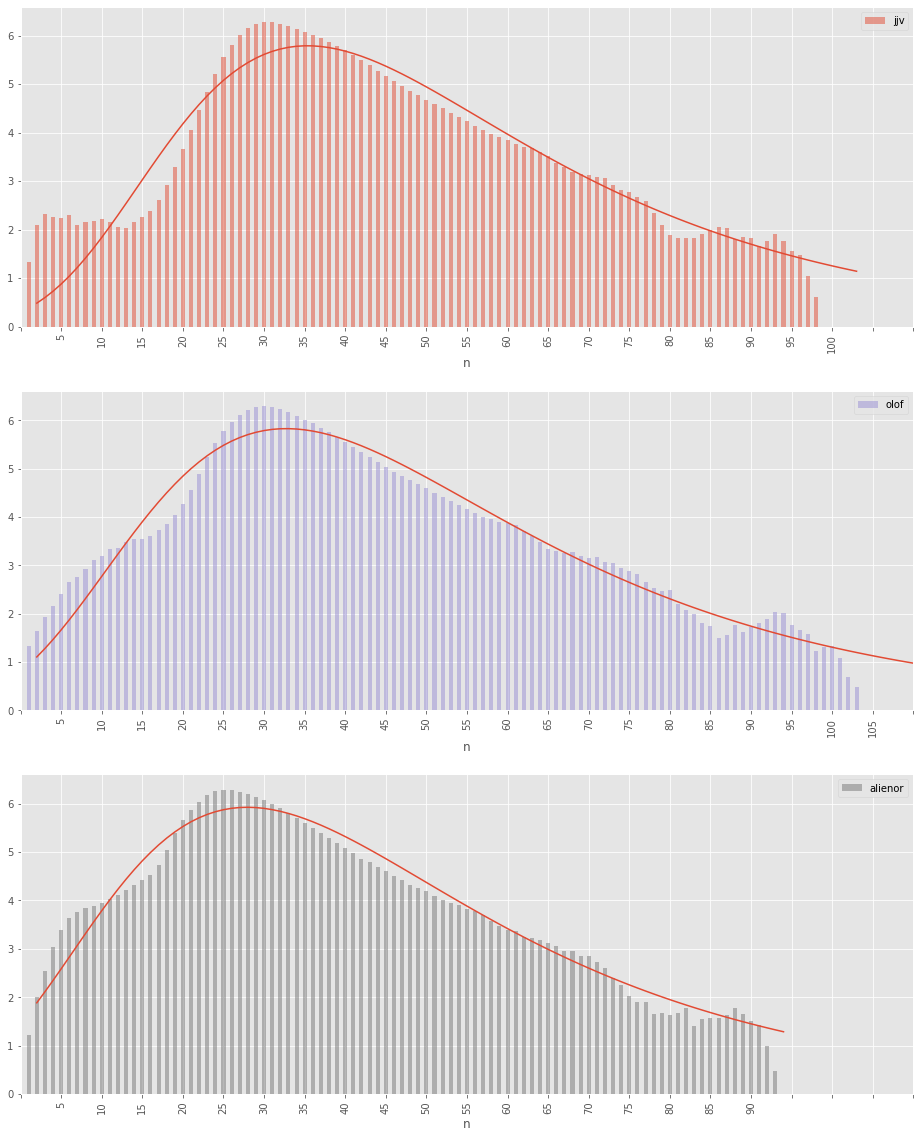

In [2]:
# Load data
data_full = pd.read_csv('cercles.csv', index_col=0, header=0, squeeze=True)

data_jjv     = data_full.jjv.drop([103,104,105,106,107,108,109])
data_olof    = data_full.olof
data_alienor = data_full.alienor.drop([94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109])

# Choose dataset
data1_nolog = data_jjv
data2_nolog = data_olof
data3_nolog = data_alienor

data1 = np.log(data_jjv)*ln2log
data2 = np.log(data_olof)*ln2log
data3 = np.log(data_alienor)*ln2log

# Plot for comparison
fig, (ax1, ax2, ax3) = plt.subplots(3)

data1.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[0]['color'], alpha=0.5, legend=True, ax=ax1)
data2.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[2]['color'], alpha=0.5, legend=True, ax=ax2)
data3.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[3]['color'], alpha=0.5, legend=True, ax=ax3)

x1  = data1.index.to_numpy()
x2  = data2.index.to_numpy()
x3  = data3.index.to_numpy()
y1 = data1.to_numpy()
y2 = data2.to_numpy()
y3 = data3.to_numpy()

popt1, pcov1 = curve_fit(moyal_func, x1, y1, p0=[2, 0, 5])
popt2, pcov2 = curve_fit(moyal_func, x2, y2, p0=[2, 0, 5])
popt3, pcov3 = curve_fit(moyal_func, x3, y3, p0=[2, 0, 5])

perr1, perr2, perr3 = np.sqrt(np.diag(pcov1)), np.sqrt(np.diag(pcov2)), np.sqrt(np.diag(pcov3))

ax1.plot(x1,moyal_func(x1, *popt1));
ax2.plot(x2,moyal_func(x2, *popt2));
ax3.plot(x3,moyal_func(x3, *popt3));

#ax.set_yscale('log')
#ax.set_ylim(1e-1,1e7)
ax1.xaxis.set_ticks(np.arange(-1, 110, 5));
ax2.xaxis.set_ticks(np.arange(-1, 110, 5));
ax3.xaxis.set_ticks(np.arange(-1, 110, 5));


Distribution de Moyal ( Approximation courante de la distribution de Landau en fait...)

$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x + e^{-x}}{2}}$$

Ici on fit ***le log de la distribution*** avec *moyal_func* :
$$g(x,x0,a,b) = \frac{a}{b} f(\frac{x-x_0}{b})$$

Les fits obtenus donnnent :

In [3]:
print('jjv')
print('Estimated [a,x0,b] = ', popt1)
print('1-sigma error on [a,x0,b] = ', perr1)
print('olof')
print('Estimated [a,x0,b] = ', popt2)
print('1-sigma error on [a,x0,b] = ', perr2)
print('alienor')
print('Estimated [a,x0,b] = ',popt3)
print('1-sigma error on [a,x0,b] = ', perr3)

jjv
Estimated [a,x0,b] =  [152.60311433  34.3382419   15.98458143]
1-sigma error on [a,x0,b] =  [3.01919655 0.50036888 0.405385  ]
olof
Estimated [a,x0,b] =  [162.71578379  31.73081259  16.93011479]
1-sigma error on [a,x0,b] =  [2.30378344 0.37613453 0.31121078]
alienor
Estimated [a,x0,b] =  [159.9438622   26.93055326  16.37113318]
1-sigma error on [a,x0,b] =  [1.6740015  0.25707114 0.22795194]


***Second try : Fitting distribution for n>10***

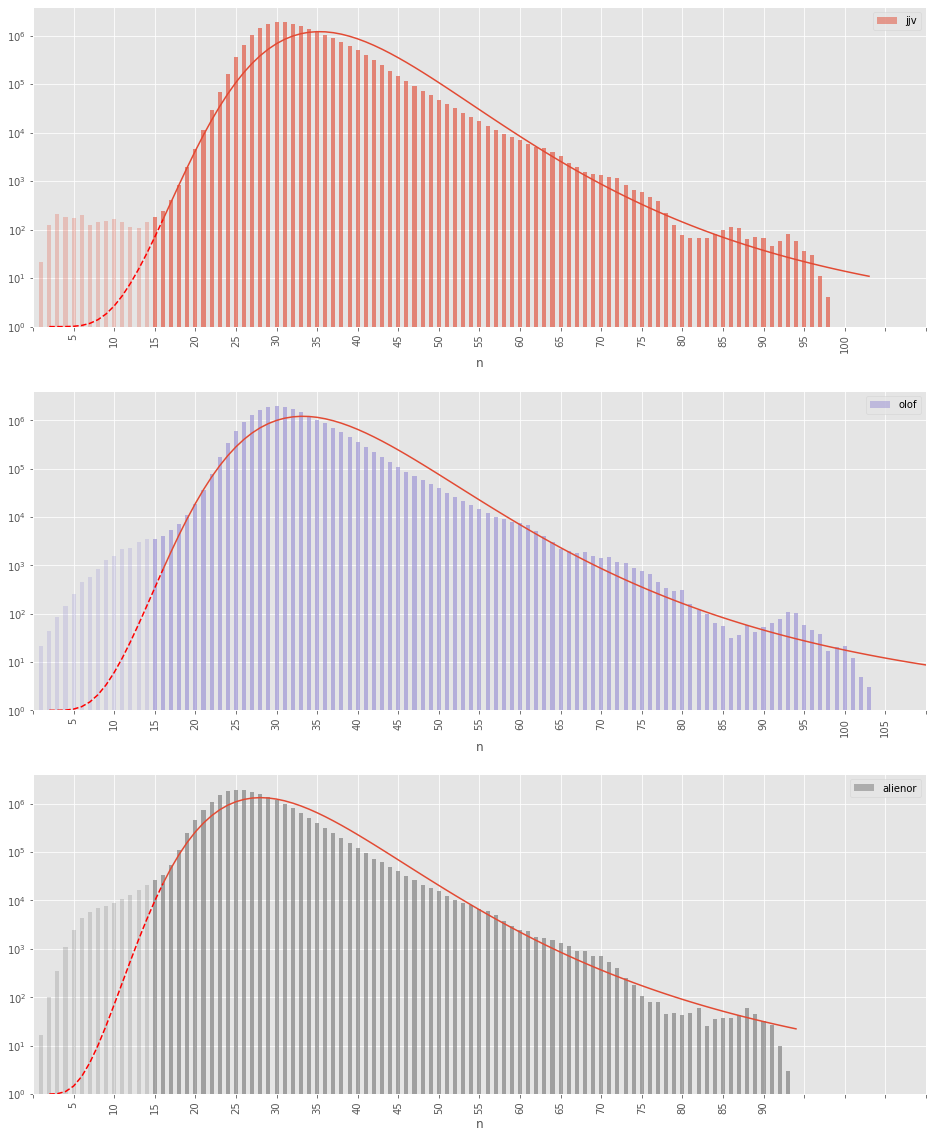

In [4]:
# Load data
data_full = pd.read_csv('cercles.csv', index_col=0, header=0, squeeze=True)

data_jjv     = data_full.jjv.drop([103,104,105,106,107,108,109])
data_olof    = data_full.olof
data_alienor = data_full.alienor.drop([94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109])

data_jjv_sup = data_jjv.where(data_jjv.index >= 15)
data_olof_sup = data_olof.where(data_olof.index >= 15)
data_alienor_sup = data_alienor.where(data_alienor.index >= 15)

# Choose dataset
data1_nolog = data_jjv
data2_nolog = data_olof
data3_nolog = data_alienor

data1 = np.log(data_jjv)*ln2log
data1sup = np.log(data_jjv_sup)*ln2log
data2 = np.log(data_olof)*ln2log
data2sup = np.log(data_olof_sup)*ln2log
data3 = np.log(data_alienor)*ln2log
data3sup = np.log(data_alienor_sup)*ln2log

# Plot for comparison
fig, (ax1, ax2, ax3) = plt.subplots(3)

data1.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[0]['color'], alpha=0.25, legend=False, ax=ax1)
data1sup.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[0]['color'], alpha=0.5, legend=True, ax=ax1)
data2.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[2]['color'], alpha=0.25, legend=False, ax=ax2)
data2sup.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[2]['color'], alpha=0.5, legend=True, ax=ax2)
data3.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[3]['color'], alpha=0.25, legend=False, ax=ax3)
data3sup.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[3]['color'], alpha=0.5, legend=True, ax=ax3)

x01 = data_full.jjv.index.to_numpy()
x02 = data_full.olof.index.to_numpy()
x03 = data_full.alienor.index.to_numpy()

x1  = data1.index.to_numpy()
x2  = data2.index.to_numpy()
x3  = data3.index.to_numpy()
y1 = data1.to_numpy()
y2 = data2.to_numpy()
y3 = data3.to_numpy()

popt1, pcov1 = curve_fit(lognorm_func, x1[15:], y1[15:], p0=[1, 1, 1])
popt2, pcov2 = curve_fit(lognorm_func, x2[15:], y2[15:], p0=[1, 1, 1])
popt3, pcov3 = curve_fit(lognorm_func, x3[15:], y3[15:], p0=[1, 1, 1])

perr1, perr2, perr3 = np.sqrt(np.diag(pcov1)), np.sqrt(np.diag(pcov2)), np.sqrt(np.diag(pcov3))

ax1.plot(x1[14:],lognorm_func(x1[14:], *popt1));
ax2.plot(x2[14:],lognorm_func(x2[14:], *popt2));
ax3.plot(x3[14:],lognorm_func(x3[14:], *popt3));

ax1.plot(x1[:15],lognorm_func(x1[:15], *popt1),'r--');
ax2.plot(x2[:15],lognorm_func(x2[:15], *popt2),'r--');
ax3.plot(x3[:15],lognorm_func(x3[:15], *popt3),'r--');

#ax.set_yscale('log')
#ax.set_ylim(1e-1,1e7)
ax1.xaxis.set_ticks(np.arange(-1, 110, 5));
ax2.xaxis.set_ticks(np.arange(-1, 110, 5));
ax3.xaxis.set_ticks(np.arange(-1, 110, 5));

ax1.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('$10^{%d}$'))
ax2.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('$10^{%d}$'))
ax3.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('$10^{%d}$'))

On fitte les données (leur log10 précisement) au-delà de n=15 par une distribution log-normale, ce qui signifie que le log(e) de la variable (ici le nombre de cercles) suit une lui normale d'espérance $\mu$ et d'écart type $\sigma$, à un facteur multiplicatif près $a$.

$$f(x, a, \mu, \sigma) = \frac{a}{x \sigma \sqrt{2 \pi}} exp (-\frac{[ln(x)-\mu]^2}{2 \sigma ^2}) $$

Les paramètres des fits obtenus donnnent :

In [5]:
print('jjv')
print('Estimated [a,mu,sigma] = ', popt1)
print('1-sigma error on [a,mu,sigma] = ', perr1)
print('olof')
print('Estimated [a,mu,sigma] = ', popt2)
print('1-sigma error on [a,mu,sigma] = ', perr2)
print('alienor')
print('Estimated [a,mu,sigma] = ',popt3)
print('1-sigma error on [a,mu,sigma] = ', perr3)

jjv
Estimated [a,mu,sigma] =  [358.53623931   3.87074785   0.57998485]
1-sigma error on [a,mu,sigma] =  [5.44489449 0.01011388 0.0100074 ]
olof
Estimated [a,mu,sigma] =  [377.93682562   3.87027163   0.63020404]
1-sigma error on [a,mu,sigma] =  [6.02803331 0.01123678 0.0115801 ]
alienor
Estimated [a,mu,sigma] =  [379.18650861   3.80098545   0.71034658]
1-sigma error on [a,mu,sigma] =  [4.80343245 0.0091018  0.01050628]


**Pour résumer l'espérance du log de la variable 'cercle' étant d'environ 3.8, un individu pris *au hasard* est en moyenne au 45 ème cercle $\pm$ 1  pour Aliénor et au 48 ème cercle $\pm$ 1 pour Jean-Joseph et Olof**